# <div  style="color:#303030;font-family:'arial blACK', sans-serif,monospace; text-align: center; padding: 50px 0; vertical-align:middle;" > <img src="https://www.nicepng.com/png/full/204-2043038_white-lightbulb-icon-light-bulb-icon-white.png" style=" background:#00a0e4;border-radius:10px;width:150px;text-align:left; margin-left:10%"  /> <span style="position:relative; bottom:70px; margin-left:5%"> Essentials of Post-processing</span> </div>

## <span style="color:#00a0e4;"> Keywords: </span>

```Low-Pass Filter```, ```Python```, ```Plotting```

# I. Introduction
<br>
<div style="width:100%; background:#00a0e4;font-family:'arial black',monospace; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" >  </div>


## <div style="color:#00a0e4;"> 1. Background </div>


As important as signal acquisition, is making sense out of the
data once collected. This generally requires a set of preparatory steps that
involve taking the recorded data, loading it, and performing utilitary tasks
such as filtering, scaling, clipping, graphical representation, and several others.
Although there are a number of ways to address these tasks, executing them
programaticaly can have tremendous advantages over other approaches. With
this set of experiments, we will briefly explore essential concepts related with
said preparatory steps, usually known as post-processing.

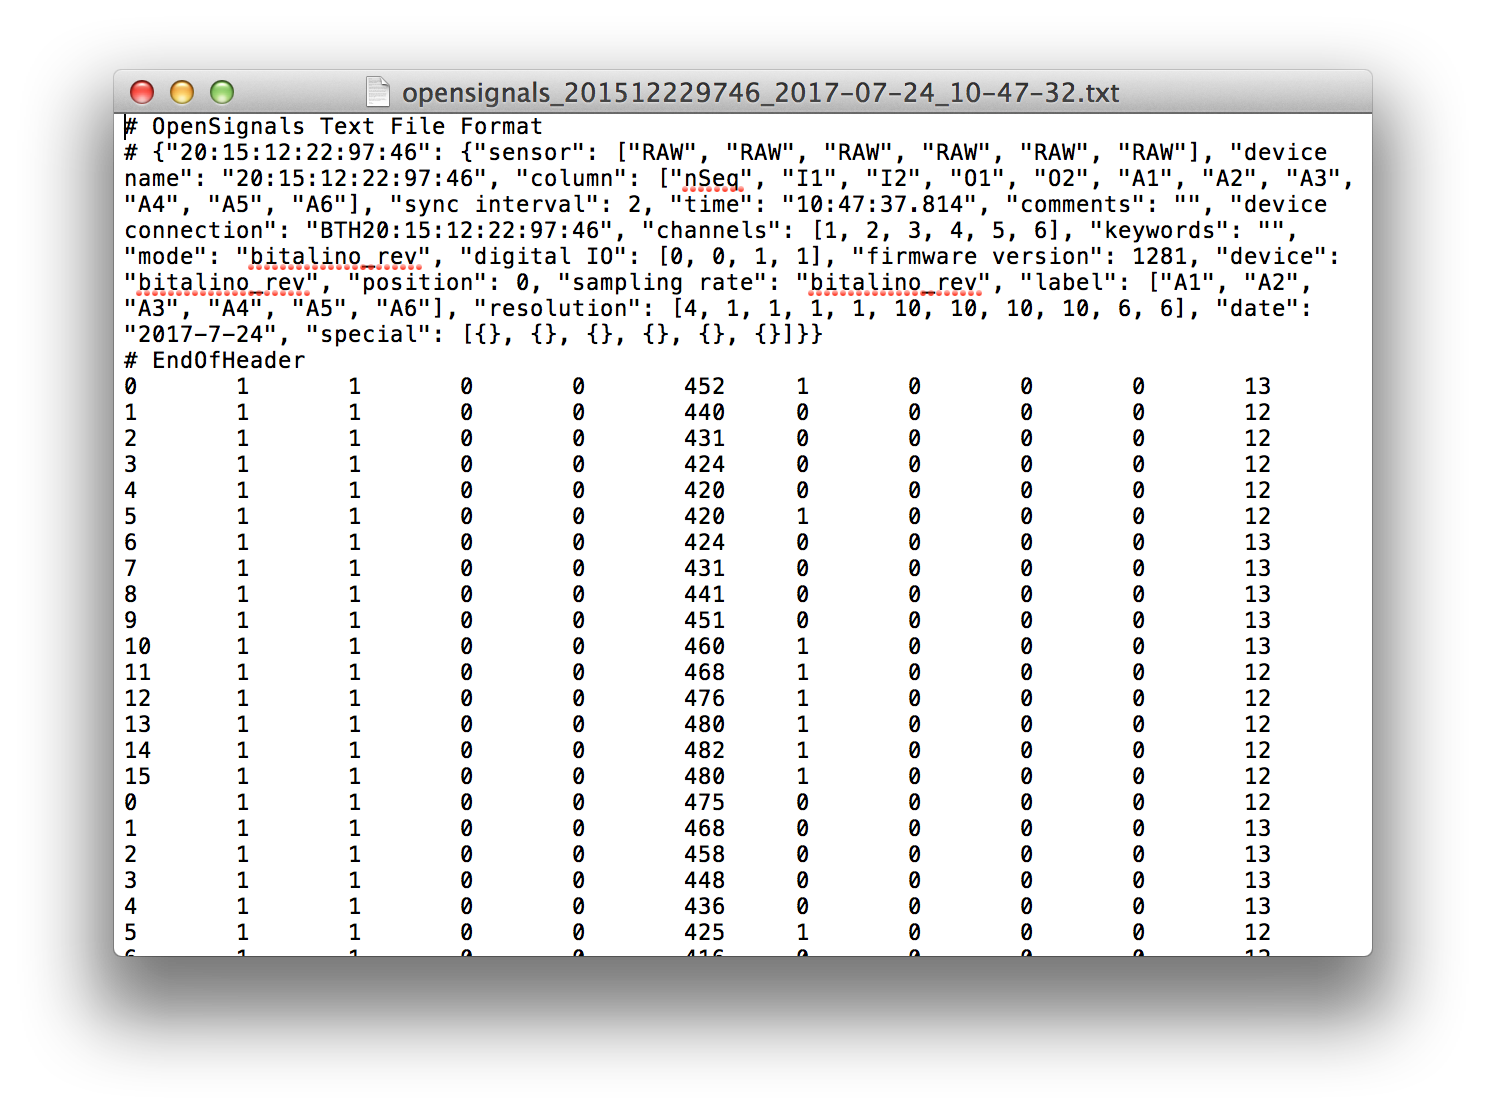

## <div style="color:#00a0e4;"> 2. Objectives</div>
* Get familiar with commonly used functions for loading, post-processing and plotting pre-recorded data using the Python programming language 

* Understand how to extract common metrics from pre-recorded data

* Implement a code base to help automate post-processing tasks, in particular by performing operations for batches of data rather than for individual files

## <div style="color:#00a0e4;"> 3. Materials </div>
* Anaconda Python 2.7
* OpenSignals (r)evolution software (optional)
* 1x BITalino (r)evolution Board BT (optional)

# II. Experimental
<br>
<div style="width:100%; background:#00a0e4;font-family:'arial black',monospace; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" >  </div>


## <div style="color:#00a0e4;">  1. Loading and Plotting</div>


Retrieving a file and providing a graphical representation of its content (either
in part or in full) is generally an entry point to get a better grasp of the data
we’re dealing with. As you know by now, it is also a useful tool to support the
reporting of tasks related with data analytics and interpretation. In this experiment we will implement code for loading and plotting data, while controlling some of the visualization parameters.

    1. Using OpenSignals, record a file with Accelerometer (ACC) sensor data in ASCII format, consisting of a full revolution of the ACC sensor performed very slowly around an axis that is perpendicular to the one being recorded; a pre-recorded example can be acessed on the 'X.Example_Files' in this repository.

    2. Create a new (empty) Python script in the Spyder IDE

    3. Write a script that loads the file, retrieves the ACC data column and graphically plots the amplitude versus time (in seconds)

    4. Add code to include title and axis labels in the plot

    5. Run your script and verify the behaviour; notice how, even though a biomechanical activity was recorded and the revolution has been done slowly, the signal still exhibits high frequency components that, in this particular case, should mostly correspond to noise

    6. One way to remove these high frequency components is by filtering the signal; implement a simple n-point moving average (aka rolling mean or smoother) filter in your script; consider 10% of the sampling rate for the window size (i.e. n)

    7. Modify the plotting part of your script to show an overlay of the raw and filtered data; format the plot to present the raw data as a black line with thickness of 3 points and the filtered data as a dashed red line

    8. Run your script and verify the behaviour

<div style="background:#62d321;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; "> Explore </span> <br>
  <div style="background:#c5e8b0;font-size:12px"> 
    Detailed information regarding the plot(...) function, made available
by the matplotlib module in Python, and its formatting options can be
found at:
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html     
</div>

## <div style="color:#00a0e4;">  2. Calibration</div>


As we have seen before, with adequate previous knowledge of certain specifications
of the acquisition system and/or sensors, it is possible to convert the digital
codes produced by an Analog-to-Digital Converter (ADC) into their correct original physical units. Sometimes though, such information may not be readily
available or accurately known beforehand, in which cases we may be able to
resort to empirical evidence to support the conversion process. This is generally
known as calibration, and will be the focus of our next experiment using ACC
data as a case study.

    1. In the case of the accelerometer we know that the device is sensitive to the gravity acceleration and that, in a full revolution, it crosses the ±1g acceleration values; these will correspond to the maximum and minimum values in the output signal, and can effectively be used as calibration coefficients to convert raw data to the correct physical units

    2. Create a copy of the Python script developed in Section 8.4

    3. Modify the code in such way that the plots show the amplitude values in g (their correct physical units); use the maximum and minimum values of the filtered ACC data as coefficients to normalize and offset the signal in such way that it is bound to ±1g

    4. Run your script and verify the behaviour; instead of being shown as the adimensional range of values that are the ADC codes, the data should be ranging between ±1g

<div style="background:#62d321;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; "> Explore </span> <br>
  <div style="background:#c5e8b0;font-size:12px"> 
    You can find additional information about the BITalino ACC sensor
(used in this experiment) on the data sheet available at:
http://bitalino.com/datasheets/REVOLUTION_ACC_Sensor_Datasheet.pdf  
</div>

## <div style="color:#00a0e4;">  3. Electromyographic (EMG) Onset Detection</div>


Until now we have been working with individual files, however, in multiple practical applications it is very useful to repeatedly apply the same operations to a batch of files. In this experiment we will explore this concept, applied to a
real-world use case of automating the characterization of EMG onsets in a set of recorded files.

    1. If you don’t have a previous recording already, record a file with Electromyography (EMG) sensor data in ASCII format (using OpenSignals), by applying the electrodes to a muscle of your liking and performing a cycle of CONTRACTION-RELEASE-REST five times (as before, maintaining the contraction for two seconds and resting for two seconds, and trying to start with a low intensity contraction, gradually increasing the level in each repetition in such way that the last corresponds to your maximum voluntary contraction ability); a pre-recorded example of EMG data can be downloaded from: https://github.com/BITalinoWorld/revolution-sample-data/tree/master/EMG


    2. Create a new (empty) Python script in the Spyder IDE
    
    3. Implement a script that loads the recorded file, computes the EMG envelope using a low pass filter with 5Hz cutoff frequency (see Figure 8.1), and plots an overlap with both signals
   
    4. Run your script, verify the behaviour, and determine a suitable threshold (by visual observation), that could be used to isolate the onsets based on the EMG envelope
   
    5. Expand your script to threshold the EMG envelope, detect the transitions in the resulting signal, and depict vertical lines in the plot marking, with different colors, the instants at which an onset and a return to a resting condition have been detected
   
    6. Run your script and verify the behaviour
   
    7. Exchange your EMG recording with four other class mates and collect the EMG recordings from them (alternatively collect additional data from your group colleagues)
    
    8. Gather all the recordings in a new folder, having the folder of your script as the root
  
    9. Copy the walktree(...) function (Figure 8.2) to the beginning of your script (just bellow the import lines)

    10. Expand your script to, instead of loading a pre-defined file, traverse your working directory using the walktree(...) function with a specification to select only files with TXT extension; you can do this by aggregating your existing plotting code under a for statement in the form: 
        for filename in walktree(’.’, r’^.TXT$’):
   
   
    11. Run your script and verify the behaviour; you should have a single plot with all the data from all the files accumulated in it
   
    12. Modify your code to create a new figure in each iteration of the repetition structure (using the figure() function)
   
    13. Run your script and verify the behaviour; you should obtain one plot per individual file

### <div style="color:#00a0e4;"> 3.1. Example - Low Pass filter implementation in Python </div>


The following Python code exemplifies a recursive folder transverser.

In [1]:
from scipy import signal

def lowpass(s,f,order=2,fs=1000.0):
    b, a = signal.butter(order, f/(fs/2))
    return signal.lfilter(b, a, s)

def walktree (top=None, spec=None):
    if top is None:
        top = os.getcwd()
    if spec is None:
        spec = r'.*?'
        
    prog = re.compile(spec)
    
    for root, _, files in os.walk(top):
        for name in files:
            if prog.search(name):
                fname = os.path.join(root, name)
                yield fname

<div style="background:#62d321;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; "> Explore </span> <br>
  <div style="background:#c5e8b0;font-size:12px"> 
   You can find the code for the walktree(...) function at (line 111 and
following) :
https://github.com/PIA-Group/BioSPPy/blob/master/biosppy/utils.py
</div>

# III. Explore
<br>
<div style="width:100%; background:#00a0e4;font-family:'arial black',monospace; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" >  </div>


## <div style="color:#00a0e4;">  1. Quiz </div>

1. In many data acquisition systems, one of the pieces of information sent by the device is a timeline or at least a sample sequence number. This is particularly useful in the case of wireless devices, since inherent to their operation are aspects such as range, low battery, and others, which can lead to loss of samples. Knowing that in data recorded with BITalino the first column is a sequence number with 4-bit, implement a script to detect if samples were lost (or not) in a given recording.
<br><br>
2. Modify the script created in Section II.1. to plot the result of the moving average filter for different block sizes (e.g. ranging from 10 − 100% in increments of 10). Show the results and comment on what you can conclude.
<br><br>
3. For the exercise in Section II.2. we used the filtered data as the reference for the calibration process. Would using raw data, which includes the high frequency components, produce a different result? Why?
<br><br>
4. Often, when performing batch processing, it is useful to store the results (e.g. plots) as files for later revision and/or reporting. Expand the script developed in Section II.3. to save the plots as individual files using the savefig(...) function.
<br><br>
5. When working with thresholds, a problem is which value to choose. Modify the script developed in Section II.3. to use a multiple of the standard deviation from a portion of signal collected at the beginning of the data aquisition process with the muscle in a resting state (which is more dependent on the data itself). Present and discuss your observations.

<div style="height:115px; background:white;border-radius:10px;text-align:center"> 

<img src="https://www.lx.it.pt/~asmc/predict/images/IT.png" alt="it" style="position: relative; margin-left: 10px; bottom:-55px;max-width:150px;height:auto;"/> 
<img src="https://cqe.tecnico.ulisboa.pt/files/files/logos/IST_A_RGB_POS.png"
         alt="alternate text" 
         style="position: relative; margin-left: 10px;  bottom:-50px; width:150px;height:auto;"/>
</div> 

<div style="width: 100%; ">
<div style="background:#00a0e4;color:white;font-family:'arial', monospace; text-align: center; padding: 50px 0; border-radius:10px; height:10px; width:100%; float:left " >
<span style="font-size:12px;position:relative; top:-25px">  Please provide us your feedback <span style="font-size:14px;position:relative;COLOR:WHITE"> [here](https://forms.gle/C8TdLQUAS9r8BNJM8)</span>.</span> 
<br>
<span style="font-size:17px;position:relative; top:-20px">  Suggestions are welcome! </span> 
</div>

```Contributors: Prof. Hugo Silva; Joana Pinto```